# INF2178 Midterm Project

**Research Question -** Does having a higher age and BP predict one's glucose levels?

**Background Information on Dataset**
From: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

*Context*
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. 

*Content*
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

*Sources:*
(a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases 
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 
(c) Date received: 9 May 1990

Number of Instances: 768 
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
    9. Class variable (0 or 1)

Missing Attribute Values: Yes 
Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

## Data Description, Cleaning and Pre-Processing

In [1]:
# Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.power import TTestIndPower
from bioinfokit.analys import stat
from sklearn import metrics
import pingouin as pg
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
col_names = [column for column in df.loc[:,:'Age'].columns]
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [4]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
df.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.describe()
# Descriptive statistics - shows counts, means, standard deviations, and quartiles

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# from pandas_profiling import ProfileReport
# # Perform Profile Report on the dataset to get the entire statistical report of the dataset in a detailed manner

# ProfileReport(df)

In [8]:
df.info()
# The feature types are correct and there are no NaN's 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Count zeroes in all columns of Dataframe
    # Reference: V. (n.d.). Count number of Zeros in Pandas Dataframe Column. thisPointer. 
    #            https://thispointer.com/count-number-of-zeros-in-pandas-dataframe-column/

for column_name in df.columns:
    column = df[column_name]
    
    # Get the count of zeros in each column 
    count = (column == 0).sum()
    print('Count of zeroes in column', column_name, ' is : ', count)

Count of zeroes in column Pregnancies  is :  111
Count of zeroes in column Glucose  is :  5
Count of zeroes in column BloodPressure  is :  35
Count of zeroes in column SkinThickness  is :  227
Count of zeroes in column Insulin  is :  374
Count of zeroes in column BMI  is :  11
Count of zeroes in column DiabetesPedigreeFunction  is :  0
Count of zeroes in column Age  is :  0
Count of zeroes in column Outcome  is :  500


**NOTE:** Implication of high number of zero values for predictor variables - lack of data (greater than 10%) can result in biased statistical analyses and lead to misleading results (e.g., see insulin and skin thickness)

Reference: Bennett, D. A. (2001). How can I deal with missing data in my study? Australian and New Zealand Journal of Public Health, 25(5), 464–469. https://doi.org/10.1111/j.1467-842x.2001.tb00294.x

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

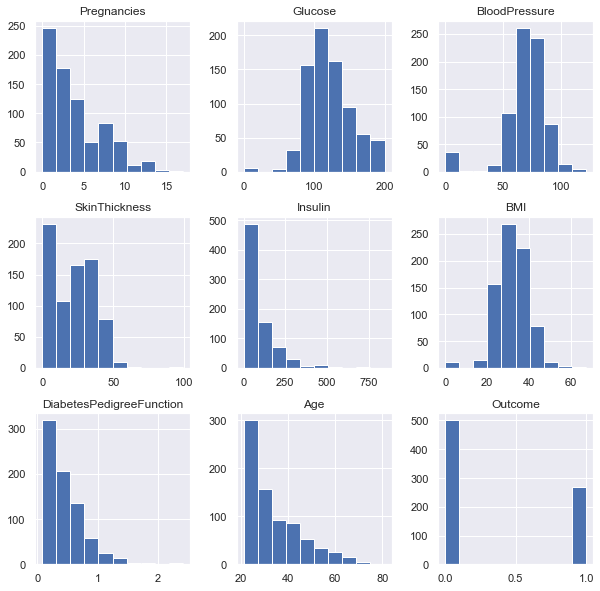

In [10]:
# Histogram displaying data from all columns
sns.set(font_scale = 1)
df.hist(bins = 10, figsize = (10, 10))

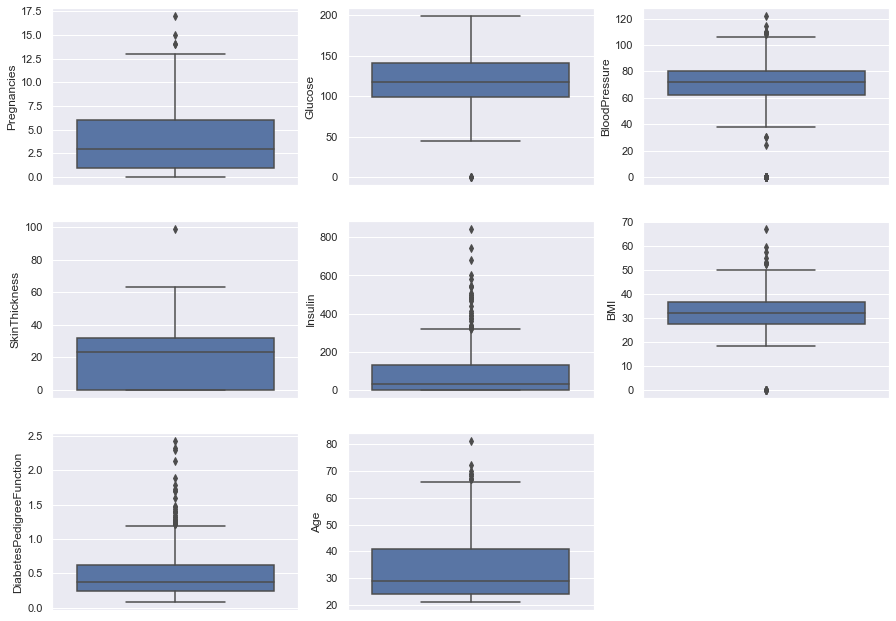

In [11]:
# Box plots for all attributes to show outliers
count=1
plt.figure(figsize=(15, 15))
for value in col_names:
    plt.subplot(4,3,count)
    ax = sns.boxplot(y=value, data=df)
    count+=1

### Cleaning - Tidy Data Principles

Reference: Wickham, H. (2014). Tidy Data. Journal of Statistical Software, 59(10), 1–23. https://doi.org/10.18637/jss.v059.i10

- Each variable must have its own column - **CHECK**
- Each observation must have its own row - **CHECK**
- Each type of observational unit forms a table - **CHECK**

What do we do with missing values?
    **References for suggestions on how to handle missing data:**
    - Dong, Y., & Peng, C. Y. J. (2013). Principled missing data methods for researchers. SpringerPlus, 2(1).
    https://doi.org/10.1186/2193-1801-2-222
    - Zhang Z. (2016). Missing data imputation: focusing on single imputation. Annals of translational medicine, 4(1), 9. 
    https://doi.org/10.3978/j.issn.2305-5839.2015.12.38
        - Zhang's work in 2016 highlights that imputing with the median is a quick and dirty method appropriate for only a 
        handful of missing data. He suggests that doing central tendency imputation underestimates variance and ignores 
        relationship with other variables. For the purpose of our testing, we are assuming that the variables are independent 
        and can test for variance after the imputation.
    
 - There can be a value of 0 for pregnancies, but not for other attributes
 - Insulin should not have a value of 0; however, low levels of insulin were often not detectable and so recorded as 0.
   Reference: MacGill, M. (2013, October 11). Finding in type 1 diabetes overturns idea of zero insulin. Medical News Today. 
   https://www.medicalnewstoday.com/articles/267241
           
**Decision:** We replace the missing values for the predictor variables - "Glucose", and "Blood Pressure" - with the median of the data in the corresponding column according to the outcome (i.e., diabetic versus non-diabetic) since the data for these attributes is not normally distributed.

In [12]:
# Calculating the medians of glucose levels for each outcome while not including existing zero values
db_df = df.loc[df["Outcome"] == 1, ["Glucose"]]
ndb_df = df.loc[df["Outcome"] == 0, ["Glucose"]]
gluc_db_df = db_df[db_df.Glucose != 0].median()
gluc_ndb_df = ndb_df[ndb_df.Glucose != 0].median()
gluc_db_median, gluc_ndb_median = int(round(gluc_db_df["Glucose"])), int(round(gluc_ndb_df["Glucose"]))
print(gluc_db_median, gluc_ndb_median)

140 107


In [13]:
# Calculating the medians of BP levels for each outcome while not including existing zero values
db_df = df.loc[df["Outcome"] == 1, ["BloodPressure"]]
ndb_df = df.loc[df["Outcome"] == 0, ["BloodPressure"]]
bp_db_df = db_df[db_df.BloodPressure != 0].median()
bp_ndb_df = ndb_df[ndb_df.BloodPressure != 0].median()
bp_db_median, bp_ndb_median = int(round(bp_db_df["BloodPressure"])), int(round(bp_ndb_df["BloodPressure"]))
print(bp_db_median, bp_ndb_median)

74 70


In [14]:
# Populate original dataframe with new adjusted categorized medians

# Glucose
for index, row in df.iterrows():
    if row[1]== 0 and row[8] == 0:
        df.loc[index,"Glucose"] = gluc_ndb_median
    elif row[1]== 0 and row[8] == 1:
        df.loc[index,"Glucose"] = gluc_db_median   

# Blood Pressure
for index, row in df.iterrows():
    if row[2]== 0 and row[8] == 0:
        df.loc[index,"BloodPressure"] = bp_ndb_median
    elif row[2]== 0 and row[8] == 1:
        df.loc[index,"BloodPressure"] = bp_db_median

In [15]:
# Check that all zeroes in the columns for the above attributes have been replaced with medians
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


In [16]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.378906      20.536458   79.799479   
std       3.369578   30.464161      12.104431      15.952218  115.244002   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Creating Categorical Variables - Binning

Health Canada uses the following age groups to compare BMI for women entering pregnancy: 
- 20-24
- 25-29
- 30-34
- 35-39
- 40+

Reference: Health Canada. (n.d.). Prenatal Nutrition Guidelines for Health Professionals: Gestational Weight Gain - Canada.ca. Government of Canada. https://www.canada.ca/en/health-canada/services/canada-food-guide/resources/prenatal-nutrition/eating-well-being-active-towards-healthy-weight-gain-pregnancy-2010.html#a6

Note that, given the dataset for the purpose of this midterm project, the 20-24 age group is modified to 21-24.

In [17]:
# Create column with age categories
df["AGEcat"]=""
for index, row in df.iterrows():
    if row[7] <= 24:
        df.loc[index,"AGEcat"]="Age-21-24"
    elif 25 <= row[7] <= 29:
        df.loc[index,"AGEcat"]="Age-25-29"
    elif 30 <= row[7] <= 34:
        df.loc[index,"AGEcat"]="Age-30-34"
    elif 35 <= row[7] <= 39:
        df.loc[index,"AGEcat"]="Age-35-39"
    elif row[7] >= 40:
        df.loc[index,"AGEcat"]="Age-40+"
df.head()
print(df['AGEcat'].value_counts().sort_index())

Age-21-24    219
Age-25-29    177
Age-30-34     92
Age-35-39     73
Age-40+      207
Name: AGEcat, dtype: int64


According to the Public Health Agency of Canada (PHAC), diastolic blood pressure (BP) below 80 mm Hg is considered normal blood pressure while diastolic BP greater than 80 mm Hg is high blood pressure.

Reference: Public Health Agency of Canada. (n.d.). Hypertension - Canada.ca. Government of Canada. https://www.canada.ca/en/public-health/services/chronic-diseases/cardiovascular-disease/hypertension.html

In [18]:
# Create column with blood pressure categories
df["BPcat"]=""
for index, row in df.iterrows():
    if row[2] < 80:
        df.loc[index,"BPcat"]="Normal"
    elif row[2] >= 80:
        df.loc[index,"BPcat"]="High"
df.head()
print(df['BPcat'].value_counts().sort_index())

High      205
Normal    563
Name: BPcat, dtype: int64


## Data Visualization and Exploratory Data Analysis

### Correlation Matrix

<AxesSubplot:>

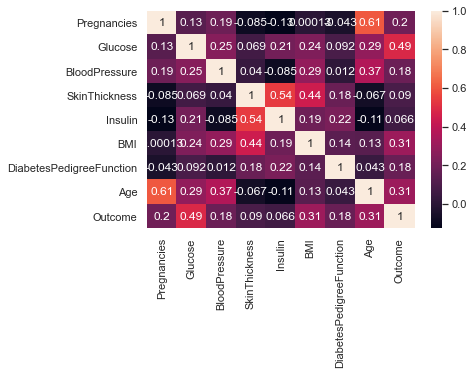

In [19]:
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix,annot = True)

From the correlation matrix, it is revealed that there is a:
- low positive correlation between age and glucose with a correlation coefficient of 0.29 
- low positive correlation between BP and glucose with a correlation coefficient of 0.25 
- moderate positive correlation between age and BP with a correlation coefficient of 0.37

Reference: Statistics Solutions. (2021, June 9). Pearson’s Correlation Coefficient. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:%7E:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.

### Box Plots of Binned Variables

[(30.0, 220.0)]

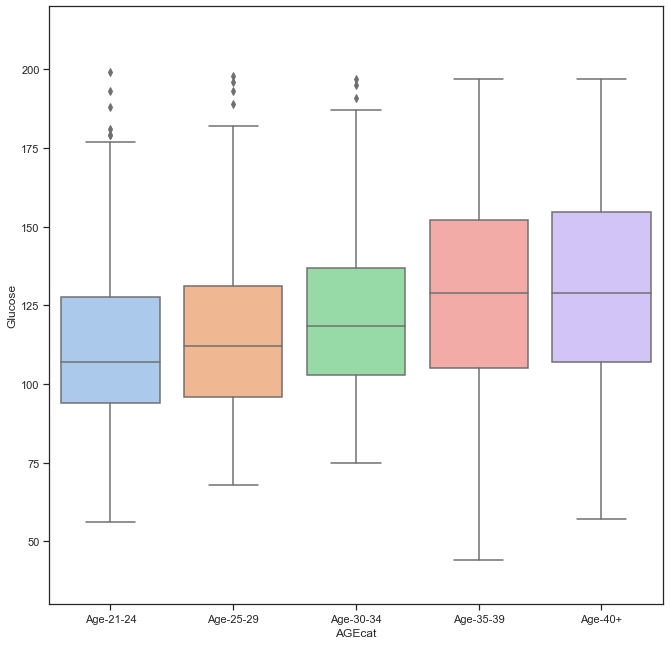

In [20]:
# Box plot of AGEcat versus Glucose 
sns.set_theme(style="ticks", palette="pastel")
figsns=plt.figure(3,figsize=(11,11))
ax = sns.boxplot(x="AGEcat", y="Glucose", data=df, order=["Age-21-24", "Age-25-29", "Age-30-34","Age-35-39", "Age-40+"])

# Limit y-axis
ax.set(ylim=(30,220))

[(30.0, 220.0)]

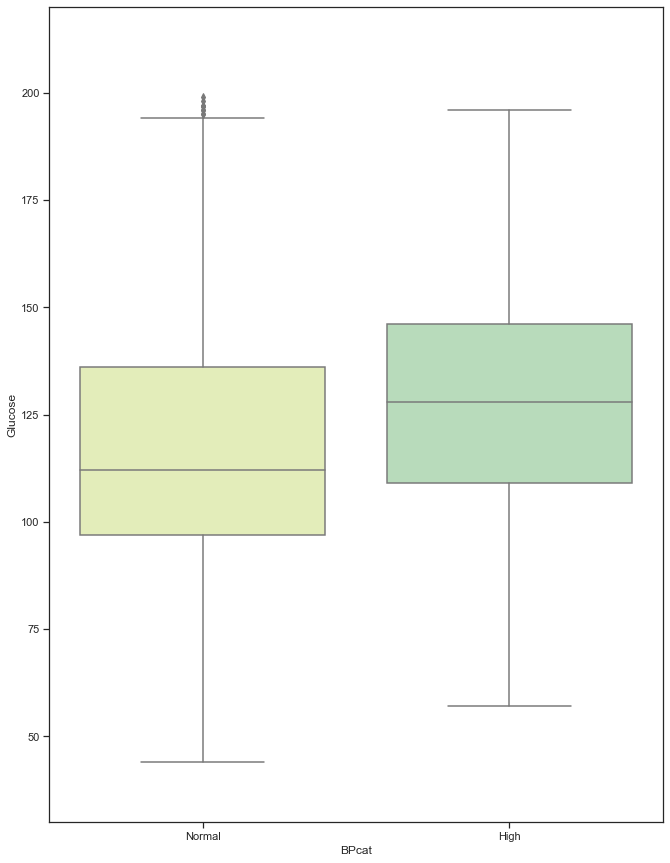

In [21]:
# Box plot of BPcat versus Glucose 
sns.set_theme(style="ticks", palette="YlGnBu")
figsns=plt.figure(3,figsize=(11,15))
ax = sns.boxplot(x="BPcat", y="Glucose", data=df, order=["Normal", "High"])

# Limit y-axis
ax.set(ylim=(30,220))

### Testing GLM Assumption - Normality - Shapiro-Wilk Test

In [22]:
#Testing Normality with Shapiro-Wilk Test
preg_shapiro = stats.shapiro(df['Pregnancies'])
gluc_shapiro = stats.shapiro(df['Glucose'])
bp_shapiro = stats.shapiro(df['BloodPressure'])
skth_shapiro = stats.shapiro(df['SkinThickness'])
ins_shapiro = stats.shapiro(df['Insulin'])
bmi_shapiro = stats.shapiro(df['BMI'])
dpf_shapiro = stats.shapiro(df['DiabetesPedigreeFunction'])
age_shapiro = stats.shapiro(df['Age'])
print("Pregnancies - ", preg_shapiro)
print("Glucose - ", gluc_shapiro)
print("BloodPressure - ", bp_shapiro)
print("SkinThickness - ", skth_shapiro)
print("Insulin - ", ins_shapiro)
print("BMI - ", bmi_shapiro)
print("DiabetesPedigreeFunction - ", dpf_shapiro)
print("Age - ", age_shapiro)

Pregnancies -  ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)
Glucose -  ShapiroResult(statistic=0.9697533249855042, pvalue=1.6375369810139873e-11)
BloodPressure -  ShapiroResult(statistic=0.9880667328834534, pvalue=6.635423687839648e-06)
SkinThickness -  ShapiroResult(statistic=0.90462726354599, pvalue=1.75157635361056e-21)
Insulin -  ShapiroResult(statistic=0.7220207452774048, pvalue=7.915248149269491e-34)
BMI -  ShapiroResult(statistic=0.9499887824058533, pvalue=1.8405621485603632e-15)
DiabetesPedigreeFunction -  ShapiroResult(statistic=0.8365186452865601, pvalue=2.477696547502535e-27)
Age -  ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)


Interpretation of Results:
For all predictor variables, the p-value is less than 0.05, so it is statistically significant. Therefore, we can reject the null hypothesis (H_0) that the data in each column is normally distributed.
Despite this, we can analyze the data considering the sample size and will continue for the sake of this midterm project.

### Testing GLM Assumption - Homogeneity of Variance - Levene's Test

In [23]:
# Glucose and Age
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "Age")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   1.2274
1  Degrees of freedom (Df)  51.0000
2                  p value   0.1384


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between glucose and age is significantly different.

In [24]:
# Glucose and Blood Pressure
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "BloodPressure")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   1.1448
1  Degrees of freedom (Df)  45.0000
2                  p value   0.2427


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between glucose and blood pressure is significantly different.

In [25]:
# Blood Pressure and Age
res=stat()
res.levene(df = df, res_var="BloodPressure", xfac_var = "Age")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   0.9565
1  Degrees of freedom (Df)  51.0000
2                  p value   0.5621


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between blood pressure and age is significantly different.

According to the Levene's tests, all variables of interest have equal variance.

### T-Tests

Independent Sample T-tests - Determine if the means of glucose levels between age categories and blood pressure categories, respectively, are statistically significant 

Reference for Code: Independent T-Test. (n.d.). Python for Data Science. https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [26]:
# Age Categories 21-24 & 25-29
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-21-24"],
                                df['Glucose'][df['AGEcat'] == "Age-25-29"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.06979883066710922 T-Statistic:-1.8181604291113824


P-value is greater than 0.05, so the difference in the average glucose levels between 21-24 and 25-29 age groups is not statistically significant.

In [27]:
# Age Categories 21-24 & 30-34
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-21-24"],
                                df['Glucose'][df['AGEcat'] == "Age-30-34"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0005592581068682268 T-Statistic:-3.487015862539026


With p < 0.05, there is a statistically significant difference in the average glucose levels between 21-24 and 30-34 age groups.

In [28]:
# Age Categories 21-24 & 35-39
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-21-24"],
                                df['Glucose'][df['AGEcat'] == "Age-35-39"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.084706038047887e-05 T-Statistic:-4.32675855117289


With p < 0.05, there is a statistically significant difference in the average glucose levels between 21-24 and 35-39 age groups.

In [29]:
# Age Categories 21-24 & 40+
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-21-24"],
                                df['Glucose'][df['AGEcat'] == "Age-40+"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.1335524056431556e-11 T-Statistic:-6.881845316386716


With p < 0.05, there is a statistically significant difference in the average glucose levels between 21-24 and 40+ age groups.

In [30]:
# Age Categories 25-29 & 30-34
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-25-29"],
                                df['Glucose'][df['AGEcat'] == "Age-30-34"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.07081713022845686 T-Statistic:-1.8138900704574397


P-value is greater than 0.05, so the difference in the average glucose levels between 25-29 and 30-34 age groups is not statistically significant.

In [31]:
# Age Categories 25-29 & 35-39
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-25-29"],
                                df['Glucose'][df['AGEcat'] == "Age-35-39"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0066578167467179665 T-Statistic:-2.7365492748417166


With p < 0.05, there is a statistically significant difference in the average glucose levels between 25-29 and 35-39 age groups.

In [32]:
# Age Categories 25-29 & 40+
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-25-29"],
                                df['Glucose'][df['AGEcat'] == "Age-40+"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:5.24108928330604e-06 T-Statistic:-4.620541819480005


With p < 0.05, there is a statistically significant difference in the average glucose levels between 25-29 and 40+ age groups.

In [33]:
# Age Categories 30-34 & 35-39
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-30-34"],
                                df['Glucose'][df['AGEcat'] == "Age-35-39"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.3325672013434485 T-Statistic:-0.9718458338885846


P-value is greater than 0.05, so the difference in the average glucose levels between 30-34 and 35-39 age groups is not statistically significant.

In [34]:
# Age Categories 30-34 & 40+
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-30-34"],
                                df['Glucose'][df['AGEcat'] == "Age-40+"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.05009164530854577 T-Statistic:-1.9671917898309859


P-value is greater than 0.05, so the difference in the average glucose levels between 30-34 and 40+ age groups is not statistically significant.

In [35]:
# Age Categories 35-39 & 40+
tStat, pValue = stats.ttest_ind(df['Glucose'][df['AGEcat'] == "Age-35-39"],
                                df['Glucose'][df['AGEcat'] == "Age-40+"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.5146258463697964 T-Statistic:-0.6524875734440033


P-value is greater than 0.05, so the difference in the average glucose levels between 35-39 and 40+ age groups is not statistically significant.

In [36]:
# Blood Pressure Categories Normal & High
tStat, pValue = stats.ttest_ind(df['Glucose'][df['BPcat'] == "Normal"],
                                df['Glucose'][df['BPcat'] == "High"])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.222909726838835e-05 T-Statistic:-4.267665210113399


With p < 0.05, there is a statistically significant difference in the average glucose levels between normal BP and high BP groups.

#### Effect Sizes and Power Analyses of T-tests

References:
- Brownlee, J. (2018, July 13). A Gentle Introduction to Statistical Power and Power Analysis in Python. Machine Learning
  Mastery. https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
- pingouin.ttest — pingouin 0.5.1 documentation. (n.d.). Pingouin. https://pingouin-stats.org/generated/pingouin.ttest.html

In [37]:
# Age Categories 21-24 & 25-29
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-21-24"], df['Glucose'][df['AGEcat'] == "Age-25-29"], paired = False)

T         dof alternative     p-val           CI95%   cohen-d  \
T-test -1.800341  360.449452   two-sided  0.072643  [-10.45, 0.46]  0.183769   

         BF10     power  
T-test  0.532  0.441948

Effect size is 0.18 (small) and power - the probability that the test correctly rejects the null hypothesis - is 0.44.

In [38]:
# Age Categories 21-24 & 30-34
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-21-24"], df['Glucose'][df['AGEcat'] == "Age-30-34"], paired = False)

T         dof alternative     p-val            CI95%  cohen-d  \
T-test -3.320144  154.037662   two-sided  0.001123  [-18.67, -4.74]  0.43323   

          BF10     power  
T-test  23.905  0.935265

Effect size is 0.43 (small-medium) and power is 0.94.

In [39]:
# Age Categories 21-24 & 35-39
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-21-24"], df['Glucose'][df['AGEcat'] == "Age-35-39"], paired = False)

T         dof alternative    p-val            CI95%  cohen-d  \
T-test -3.785041  101.340891   two-sided  0.00026  [-25.16, -7.86]  0.58475   

           BF10     power  
T-test  112.291  0.990674

Effect size is 0.58 (medium) and power is 0.99.

In [40]:
# Age Categories 21-24 & 40+
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-21-24"], df['Glucose'][df['AGEcat'] == "Age-40+"], paired = False)

T         dof alternative         p-val             CI95%  \
T-test -6.842056  397.037471   two-sided  2.967688e-11  [-24.98, -13.83]   

         cohen-d       BF10  power  
T-test  0.667118  2.714e+08    1.0

Effect size is 0.67 (medium-large) and power is 1.0.

In [41]:
# Age Categories 25-29 & 30-34
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-25-29"], df['Glucose'][df['AGEcat'] == "Age-30-34"], paired = False)

T         dof alternative     p-val           CI95%   cohen-d  \
T-test -1.798273  180.068483   two-sided  0.073809  [-14.09, 0.65]  0.233135   

         BF10    power  
T-test  0.646  0.43944

Effect size is 0.23 (small) and power is 0.44.

In [42]:
# Age Categories 25-29 & 35-39
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-25-29"], df['Glucose'][df['AGEcat'] == "Age-35-39"], paired = False)

T        dof alternative    p-val           CI95%   cohen-d  \
T-test -2.54155  115.61822   two-sided  0.01236  [-20.5, -2.54]  0.380649   

         BF10     power  
T-test  3.059  0.778155

Effect size is 0.38 (small-medium) and power is 0.78.

In [43]:
# Age Categories 25-29 & 40+
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-25-29"], df['Glucose'][df['AGEcat'] == "Age-40+"], paired = False)

T         dof alternative     p-val            CI95%   cohen-d  \
T-test -4.662323  381.342265   two-sided  0.000004  [-20.49, -8.33]  0.473028   

            BF10     power  
T-test  3188.131  0.995963

Effect size is 0.47 (medium) and power is 0.96.

In [44]:
# Age Categories 30-34 & 35-39
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-30-34"], df['Glucose'][df['AGEcat'] == "Age-35-39"], paired = False)

T         dof alternative    p-val           CI95%   cohen-d  \
T-test -0.955091  142.444504   two-sided  0.34115  [-14.74, 5.14]  0.152329   

         BF10     power  
T-test  0.258  0.161868

Effect size is 0.15 (small) and power is 0.16.

In [45]:
# Age Categories 30-34 & 40+
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-30-34"], df['Glucose'][df['AGEcat'] == "Age-40+"], paired = False)

T         dof alternative     p-val            CI95%   cohen-d  \
T-test -2.035115  189.531642   two-sided  0.043232  [-15.16, -0.24]  0.246492   

        BF10     power  
T-test  0.97  0.500389

Effect size is 0.25 (small) and power is 0.50.

In [46]:
# Age Categories 35-39 & 40+
pg.ttest(df['Glucose'][df['AGEcat'] == "Age-35-39"], df['Glucose'][df['AGEcat'] == "Age-40+"], paired = False)

T         dof alternative     p-val           CI95%   cohen-d  \
T-test -0.633042  119.681747   two-sided  0.527914  [-11.95, 6.16]  0.088819   

         BF10     power  
T-test  0.179  0.099668

Effect size is 0.09 (small) and power is 0.10.

In [47]:
# Blood Pressure Categories Normal & High
pg.ttest(df['Glucose'][df['BPcat'] == "Normal"], df['Glucose'][df['BPcat'] == "High"], paired = False)

T         dof alternative     p-val            CI95%   cohen-d  \
T-test -4.361741  377.806574   two-sided  0.000017  [-15.22, -5.76]  0.348129   

           BF10     power  
T-test  893.316  0.989342

Effect size is 0.35 (small-medium) and power is 0.99.

In [48]:
# Required sample size to meet standard metrics

from pingouin import power_ttest
print('Sample size: %.2f' % pg.power_ttest(d=0.8, power=0.8, contrast='one-sample'))

Sample size: 14.30


Required sample size to run appropriate statistical tests is approximately 14. The sample size of each group in our dataset is greater than 14, so they meet the requirement.

## ANOVAs

### One-Way ANOVAs

In [49]:
# Age & Glucose ONE-WAY ANOVA
model = ols('Glucose ~ AGEcat', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
AGEcat     47691.872633    4.0  13.697874  8.593993e-11
Residual  664134.044034  763.0        NaN           NaN

In [50]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('AGEcat') # Post hoc tests are like t-tests
pair_t.result_frame

coef   std err         t         P>|t|  \
Age-25-29-Age-21-24   4.992183  2.981978  1.674118  9.451728e-02   
Age-30-34-Age-21-24  11.708408  3.665471  3.194243  1.459593e-03   
Age-35-39-Age-21-24  16.511416  3.987251  4.141053  3.843061e-05   
Age-40+-Age-21-24    19.405268  2.859981  6.785103  2.328412e-11   
Age-30-34-Age-25-29   6.716225  3.791938  1.771185  7.692903e-02   
Age-35-39-Age-25-29  11.519232  4.103813  2.806958  5.128719e-03   
Age-40+-Age-25-29    14.413084  3.020365  4.771968  2.186456e-06   
Age-35-39-Age-30-34   4.803008  4.624366  1.038630  2.993057e-01   
Age-40+-Age-30-34     7.696860  3.696767  2.082052  3.767046e-02   
Age-40+-Age-35-39     2.893852  4.016040  0.720574  4.713926e-01   

                     Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  reject-hs  
Age-25-29-Age-21-24       -0.861673        10.846040  2.739937e-01      False  
Age-30-34-Age-21-24        4.512802        18.904014  1.017252e-02       True  
Age-35-39-Age-21-24        8.684132        24.338700  3.074035e-04       True  
Age-40+-Age-21-24         13.790902        25.019634  2.328412e-10       True  
Age-30-34-Age-25-29       -0.727645        14.160094  2.739937e-01      False  
Age-35-39-Age-25-29        3.463128        19.575337  3.038045e-02       True  
Age-40+-Age-25-29          8.483873        20.342296  1.967793e-05       True  
Age-35-39-Age-30-34       -4.274984        13.880999  5.090274e-01      False  
Age-40+-Age-30-34          0.439817        14.953902  1.746862e-01      False  
Age-40+-Age-35-39         -4.989947        10.777652  5.090274e-01      False

There is no significant difference in average glucose levels between 21-24 and 25-29 age groups, but there is a statistically significant difference between averages for 21-24 age group and other categories, as well as between 25-29 age group and the 35-39 and 40+ age groups, respectively. 

For age categories less than 35 years (i.e., 21-24, 25-29, and 30-34), glucose levels are not significantly different when the minimum ages in the categories being compared are 5 years or less. Also, there is no significant difference between glucose levels among the categories with age greater than or equal to 30.

In [51]:
# Post hoc test with pingouin to show effect size (Cohen's d)
pt = pg.pairwise_tukey(dv='Glucose', between='AGEcat', effsize='cohen', data=df)
pt

A          B     mean(A)     mean(B)       diff        se  \
0  Age-21-24  Age-25-29  112.324201  117.316384  -4.992183  2.981978   
1  Age-21-24  Age-30-34  112.324201  124.032609 -11.708408  3.665471   
2  Age-21-24  Age-35-39  112.324201  128.835616 -16.511416  3.987251   
3  Age-21-24    Age-40+  112.324201  131.729469 -19.405268  2.859981   
4  Age-25-29  Age-30-34  117.316384  124.032609  -6.716225  3.791938   
5  Age-25-29  Age-35-39  117.316384  128.835616 -11.519232  4.103813   
6  Age-25-29    Age-40+  117.316384  131.729469 -14.413084  3.020365   
7  Age-30-34  Age-35-39  124.032609  128.835616  -4.803008  4.624366   
8  Age-30-34    Age-40+  124.032609  131.729469  -7.696860  3.696767   
9  Age-35-39    Age-40+  128.835616  131.729469  -2.893852  4.016040   

          T       p-tukey     cohen  
0 -1.674118  4.506529e-01 -0.169210  
1 -3.194243  1.266467e-02 -0.396855  
2 -4.141053  3.695420e-04 -0.559653  
3 -6.785103  2.329621e-10 -0.657740  
4 -1.771185  3.912449e-01 -0.227646  
5 -2.806958  4.089611e-02 -0.390443  
6 -4.771968  2.154509e-05 -0.488530  
7 -1.038630  8.373441e-01 -0.162797  
8 -2.082052  2.288787e-01 -0.260884  
9 -0.720574  9.517705e-01 -0.098087

There is no significant difference in average glucose levels between 21-24 and 25-29 age groups, but there is a statistically significant difference between averages for 21-24 age group and other categories. There is also a significant difference between 25-29 age group and the 35-39 and 40+ age groups, respectively. 

For age categories less than 35 years (i.e., 21-24, 25-29, and 30-34), glucose levels are not significantly different when the minimum ages in the categories being compared are 5 years or less. Also, there is no significant difference between glucose levels among the categories with age greater than or equal to 30.

Effect sizes range from small to medium. The Cohen's d values are all negative because the mean glucose level of the first group was smaller than the mean of the second group in each test.

In [52]:
# BP & Glucose ONE-WAY ANOVA
model = ols('Glucose ~ BPcat', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F    PR(>F)
BPcat      16531.812174    1.0  18.212966  0.000022
Residual  695294.104492  766.0        NaN       NaN

In [53]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('BPcat') 
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
Normal-High -10.488411  2.457646 -4.267665  0.000022      -15.312933   

             Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-High         -5.66389   0.000022       True

There is a significant difference in glucose levels between women with normal blood pressure and those with high blood pressure.

In [54]:
# Post hoc test with pingouin to show effect size (Cohen's d)
pt = pg.pairwise_tukey(dv='Glucose', between='BPcat', effsize='cohen', data=df)
pt

A       B     mean(A)     mean(B)       diff        se         T  \
0  High  Normal  129.365854  118.877442  10.488411  2.457646  4.267665   

    p-tukey     cohen  
0  0.000022  0.348129

There is still a significant difference in glucose levels between women with high blood pressure and those with normal blood pressure. The size of the test's effect is 0.35, which is small-medium.

#### Power Analyses

In [55]:
# Glucose and Age
print('Results for ANOVA')
print(pg.anova(dv='Glucose', between='AGEcat', data=df, detailed=True))

Results for ANOVA
   Source             SS   DF            MS          F         p-unc       np2
0  AGEcat   47691.872633    4  11922.968158  13.697874  8.593993e-11  0.066999
1  Within  664134.044034  763    870.424697        NaN           NaN       NaN


Eta squared (n2) and partial eta squared (np2) are measures of effect size. Though different, they can be used to determine the power of a test. In the case of one-way ANOVAs, np2 is equal to n2.

References:
- Richardson, J. T. (2011). Eta squared and partial eta squared as measures of effect size in educational research. Educational   Research Review, 6(2), 135–147. https://doi.org/10.1016/j.edurev.2010.12.001
- Z. (2021, March 1). What is Partial Eta Squared? (Definition & Example). Statology. https://www.statology.org/partial-eta-squared/

np2 value approximates 0.07, therefore indicating a medium effect.

In [56]:
print('Power')
print(pg.power_anova(eta=0.066999, k=5, n=768))

Power
1.0


Power is equal to 1, indicating that the test is good at detecting a false null hypothesis. 

In [57]:
print('Minimum Sample Required to Achieve Statistical Power of 80%')
print(pg.power_anova(eta=0.066999, k=5, power=0.8))

Minimum Sample Required to Achieve Statistical Power of 80%
34.2032439890178


Minimum sample size required is approximately 34. Since each age category contains more than 34 observations, it meets the requirement. 

In [58]:
# Glucose and Blood Pressure
print('Results for ANOVA')
print(pg.anova(dv='Glucose', between='BPcat', data=df, detailed=True))

Results for ANOVA
   Source             SS   DF            MS          F     p-unc       np2
0   BPcat   16531.812174    1  16531.812174  18.212966  0.000022  0.023225
1  Within  695294.104492  766    907.694653        NaN       NaN       NaN


np2 value approximates 0.02, therefore indicating a small effect.

In [59]:
print('Power')
print(pg.power_anova(eta=0.023225, k=2, n=768))

Power
0.9999774411921784


Power is approximately equal to 1, indicating that the test is good at detecting a false null hypothesis. 

In [60]:
print('Minimum Sample Required to Achieve Statistical Power of 80%')
print(pg.power_anova(eta=0.023225, k=2, power=0.8))

Minimum Sample Required to Achieve Statistical Power of 80%
166.0152644313718


Minimum sample size required is approximately 166. Since each blood pressure category contains more than 166 observations, it meets the requirement. 

### Two-Way ANOVA

In [61]:
# Age+BP & Glucose TWO-WAY ANOVA
model = ols('Glucose ~ C(AGEcat) + C(BPcat) + C(AGEcat):C(BPcat)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
C(AGEcat)            38651.248114    4.0  11.288296  6.675573e-09
C(BPcat)              7491.187656    1.0   8.751360  3.189976e-03
C(AGEcat):C(BPcat)    7792.805357    4.0   2.275929  5.958297e-02
Residual            648850.051021  758.0        NaN           NaN

Since p value for AGEcat is less than 0.05, we can reject the null hypothesis that the mean glucose levels of all the age groups are equal.

P value for BPcat is also statistically significant, so we can reject the null hypothesis that the mean glucose levels for the women with normal blood pressure and blood pressure are the same.

The final p value for both independent variables is greater than 0.05, therefore we do not reject the null hypothesis that there is no interaction between age and blood pressure. Therefore, age and blood pressure do not affect each other to influence glucose levels.

In [62]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('C(AGEcat)')
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
Age-25-29-Age-21-24  -7.392713  6.668971 -1.108524  0.267987      -20.484560   
Age-30-34-Age-21-24  -8.445344  8.185448 -1.031751  0.302518      -24.514185   
Age-35-39-Age-21-24   2.964744  7.590492  0.390586  0.696213      -11.936140   
Age-40+-Age-21-24     9.876018  5.658569  1.745321  0.081334       -1.232311   
Age-30-34-Age-25-29  -1.052632  8.220655 -0.128047  0.898146      -17.190587   
Age-35-39-Age-25-29  10.357456  7.628445  1.357742  0.174950       -4.617932   
Age-40+-Age-25-29    17.268731  5.709379  3.024625  0.002573        6.060657   
Age-35-39-Age-30-34  11.410088  8.984406  1.269988  0.204479       -6.227187   
Age-40+-Age-30-34    18.321362  7.424513  2.467685  0.013819        3.746311   
Age-40+-Age-35-39     6.911275  6.762943  1.021933  0.307139       -6.365049   

                     Conf. Int. Upp.  pvalue-hs  reject-hs  
Age-25-29-Age-21-24         5.699135   0.789819      False  
Age-30-34-Age-21-24         7.623497   0.789819      False  
Age-35-39-Age-21-24        17.865627   0.907713      False  
Age-40+-Age-21-24          20.984347   0.492706      False  
Age-30-34-Age-25-29        15.085323   0.907713      False  
Age-35-39-Age-25-29        25.332845   0.739767      False  
Age-40+-Age-25-29          28.476804   0.025439       True  
Age-35-39-Age-30-34        29.047362   0.746539      False  
Age-40+-Age-30-34          32.896413   0.117712      False  
Age-40+-Age-35-39          20.187598   0.789819      False

In [63]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('C(BPcat)')
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
Normal-High -17.949145  5.167626 -3.473383  0.000543      -28.093704   

             Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-High        -7.804586   0.000543       True

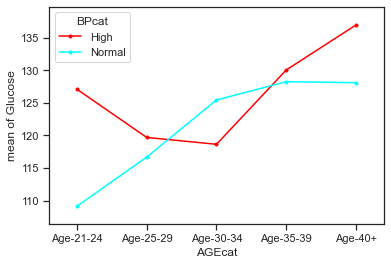

In [64]:
from statsmodels.graphics.factorplots import interaction_plot

# Interaction Plot
fig = interaction_plot(x=df['AGEcat'], trace=df['BPcat'], response=df['Glucose'])
plt.show()

The interaction plot visualizes the effect of the independent variables - AGEcat and BPcat - on each other. There is some interaction.

In [65]:
# Post Hoc
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='AGEcat', anova_model='Glucose ~ C(AGEcat) + C(BPcat) + C(AGEcat):C(BPcat)')
res.tukey_summary

group1     group2       Diff      Lower      Upper   q-value   p-value
0    Age-40+  Age-30-34   7.696860  -2.327342  17.721062  2.969166  0.221330
1    Age-40+  Age-21-24  19.405268  11.650106  27.160430  9.676081  0.001000
2    Age-40+  Age-25-29  14.413084   6.223024  22.603145  6.805195  0.001000
3    Age-40+  Age-35-39   2.893852  -7.996094  13.783798  1.027594  0.900000
4  Age-30-34  Age-21-24  11.708408   1.769068  21.647747  4.555238  0.011608
5  Age-30-34  Age-25-29   6.716225  -3.566043  16.998492  2.525847  0.383598
6  Age-30-34  Age-35-39   4.803008  -7.736484  17.342499  1.481167  0.810904
7  Age-21-24  Age-25-29   4.992183  -3.093788  13.078155  2.387421  0.443524
8  Age-21-24  Age-35-39  16.511416   5.699535  27.323296  5.905461  0.001000
9  Age-25-29  Age-35-39  11.519232   0.391280  22.647184  4.002939  0.038297

In [66]:
# Post Hoc
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='BPcat', anova_model='Glucose ~ C(AGEcat) + C(BPcat) + C(AGEcat):C(BPcat)')
res.tukey_summary

group1 group2       Diff   Lower      Upper  q-value  p-value
0  Normal   High  10.488411  5.8032  15.173622  6.21495    0.001

In [67]:
# Post Hoc for Interaction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var=['AGEcat', 'BPcat'], 
              anova_model='Glucose ~ C(AGEcat) + C(BPcat) + C(AGEcat):C(BPcat)')
res.tukey_summary

group1               group2       Diff      Lower      Upper  \
0     (Age-40+, Normal)      (Age-40+, High)   8.862777  -4.254106  21.979661   
1     (Age-40+, Normal)  (Age-30-34, Normal)   2.651808 -11.085791  16.389407   
2     (Age-40+, Normal)    (Age-30-34, High)   9.458585 -13.438896  32.356066   
3     (Age-40+, Normal)  (Age-21-24, Normal)  18.962386   8.075036  29.849736   
4     (Age-40+, Normal)    (Age-21-24, High)   1.013241 -16.064703  18.091185   
5     (Age-40+, Normal)  (Age-25-29, Normal)  11.421099  -0.096655  22.938853   
6     (Age-40+, Normal)    (Age-25-29, High)   8.405953  -8.841427  25.653334   
7     (Age-40+, Normal)  (Age-35-39, Normal)   0.154734 -15.547266  15.856734   
8     (Age-40+, Normal)    (Age-35-39, High)   1.951503 -18.779760  22.682766   
9       (Age-40+, High)  (Age-30-34, Normal)  11.514585  -3.300103  26.329273   
10      (Age-40+, High)    (Age-30-34, High)  18.321362  -5.238095  41.880819   
11      (Age-40+, High)  (Age-21-24, Normal)  27.825163  15.606827  40.043500   
12      (Age-40+, High)    (Age-21-24, High)   9.876018  -8.079748  27.831784   
13      (Age-40+, High)  (Age-25-29, Normal)  20.283876   7.500605  33.067148   
14      (Age-40+, High)    (Age-25-29, High)  17.268731  -0.848264  35.385726   
15      (Age-40+, High)  (Age-35-39, Normal)   8.708043  -7.944469  25.360556   
16      (Age-40+, High)    (Age-35-39, High)   6.911275 -14.548889  28.371438   
17  (Age-30-34, Normal)    (Age-30-34, High)   6.806777 -17.103827  30.717382   
18  (Age-30-34, Normal)  (Age-21-24, Normal)  16.310578   3.428159  29.192998   
19  (Age-30-34, Normal)    (Age-21-24, High)   1.638567 -16.775518  20.052652   
20  (Age-30-34, Normal)  (Age-25-29, Normal)   8.769291  -4.650136  22.188718   
21  (Age-30-34, Normal)    (Age-25-29, High)   5.754146 -12.817190  24.325481   
22  (Age-30-34, Normal)  (Age-35-39, Normal)   2.806542 -14.339162  19.952246   
23  (Age-30-34, Normal)    (Age-35-39, High)   4.603311 -17.241772  26.448393   
24    (Age-30-34, High)  (Age-21-24, Normal)   9.503801 -12.891059  31.898661   
25    (Age-30-34, High)    (Age-21-24, High)   8.445344 -17.528711  34.419400   
26    (Age-30-34, High)  (Age-25-29, Normal)   1.962514 -20.745503  24.670531   
27    (Age-30-34, High)    (Age-25-29, High)   1.052632 -25.033141  27.138404   
28    (Age-30-34, High)  (Age-35-39, Normal)   9.613319 -15.477480  34.704118   
29    (Age-30-34, High)    (Age-35-39, High)  11.410088 -17.099220  39.919396   
30  (Age-21-24, Normal)    (Age-21-24, High)  17.949145   1.551240  34.347050   
31  (Age-21-24, Normal)  (Age-25-29, Normal)   7.541287  -2.941737  18.024310   
32  (Age-21-24, Normal)    (Age-25-29, High)  10.556433  -6.017862  27.130728   
33  (Age-21-24, Normal)  (Age-35-39, Normal)  19.117120   4.157577  34.076663   
34  (Age-21-24, Normal)    (Age-35-39, High)  20.913889   0.739143  41.088635   
35    (Age-21-24, High)  (Age-25-29, Normal)  10.407858  -6.415208  27.230925   
36    (Age-21-24, High)    (Age-25-29, High)   7.392713 -13.769259  28.554684   
37    (Age-21-24, High)  (Age-35-39, Normal)   1.167975 -18.754618  21.090568   
38    (Age-21-24, High)    (Age-35-39, High)   2.964744 -21.121397  27.050884   
39  (Age-25-29, Normal)    (Age-25-29, High)   3.015146 -13.979899  20.010190   
40  (Age-25-29, Normal)  (Age-35-39, Normal)  11.575833  -3.848569  27.000236   
41  (Age-25-29, Normal)    (Age-35-39, High)  13.372602  -7.149208  33.894411   
42    (Age-25-29, High)  (Age-35-39, Normal)   8.560687 -11.507339  28.628714   
43    (Age-25-29, High)    (Age-35-39, High)  10.357456 -13.849116  34.564028   
44  (Age-35-39, Normal)    (Age-35-39, High)   1.796769 -21.334137  24.927674   

      q-value   p-value  
0    3.032155  0.496916  
1    0.866251  0.900000  
2    1.853748  0.900000  
3    7.815974  0.001000  
4    0.266250  0.900000  
5    4.449922  0.054168  
6    2.187138  0.862945  
7    0.044222  0.900000  
8    0.422431  0.900000  
9    3.487932  0.288808  
10  

## Multiple Linear Regression

In [68]:
# Comparing Age and BP to Glucose

X = df[['Age','BloodPressure']]
y = df['Glucose']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 73.45608601937523
Coefficients: [0.60041185 0.38659851]


The y-intercept is 73.456. It is the expected glucose level when the values of age and blood pressure are both 0 (which cannot happen).

In [69]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age               0.600412
BloodPressure     0.386599

The coefficients indicate that for every one-unit shift in age and blood pressure, glucose levels increase by approximately 0.6 and 0.39, respectively.

In [70]:
# Making Predictions
y_pred = regressor.predict(X_test)
r2 = regressor.score(X, y)

In [71]:
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction.head(10)

Actual   Predicted
661     199  116.046634
122     107  115.873849
113      76  112.435490
14      166  131.912183
529     111  117.197757
103      81  115.701063
338     152  123.424361
588     176  137.924974
395     127  110.889096
204     103  134.313831

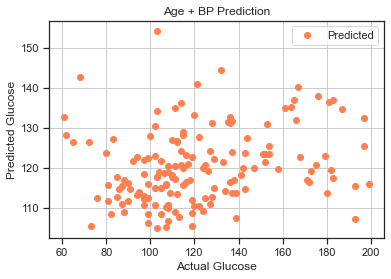

In [72]:
# Plotting
prediction.plot(x='Actual', y='Predicted', style='o', c="coral")
plt.title('Age + BP Prediction')
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')
plt.grid()
plt.show()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2)

Mean Absolute Error: 23.340300269132374
Mean Squared Error: 917.530710156841
Root Mean Squared Error: 30.290769388657676
R-squared: 0.09311600505713791


The R-squared value indicates that only about 9.31% of the variance for glucose is explained by the independent variables, age and blood pressure.

## ANCOVA 

For the ANCOVA, Diabetes Pedigree Function is the chosen covariate. This allows for the independent variable to be held constant, therefore removing the variance in the dependent variable - Glucose - attributable to the influence of genetics. 

In [74]:
from dfply import *

In [75]:
# Summary statistics for dependent variable, glucose 
# Find count, mean, standard deviation for each level of categorical variable (AGEcat) 
df >> group_by(X.AGEcat) >> summarize(n=X["Glucose"].count(), mean = X["Glucose"].mean(), std = X["Glucose"].std())

AGEcat    n        mean        std
0  Age-21-24  219  112.324201  26.005644
1  Age-25-29  177  117.316384  28.537085
2  Age-30-34   92  124.032609  29.325926
3  Age-35-39   73  128.835616  34.113379
4    Age-40+  207  131.729469  32.028874

In [76]:
# Summary statistics for covariate, diabetes pedigree function
# Covariate = DiabetesPedigreeFunction -> removes genetic influence
df >> group_by(X.AGEcat) >> summarize(n=X["DiabetesPedigreeFunction"].count(), 
                                mean = X["DiabetesPedigreeFunction"].mean(), std = X["DiabetesPedigreeFunction"].std())

AGEcat    n      mean       std
0  Age-21-24  219  0.425142  0.270137
1  Age-25-29  177  0.483102  0.364955
2  Age-30-34   92  0.578837  0.421637
3  Age-35-39   73  0.464082  0.287829
4    Age-40+  207  0.466932  0.320381

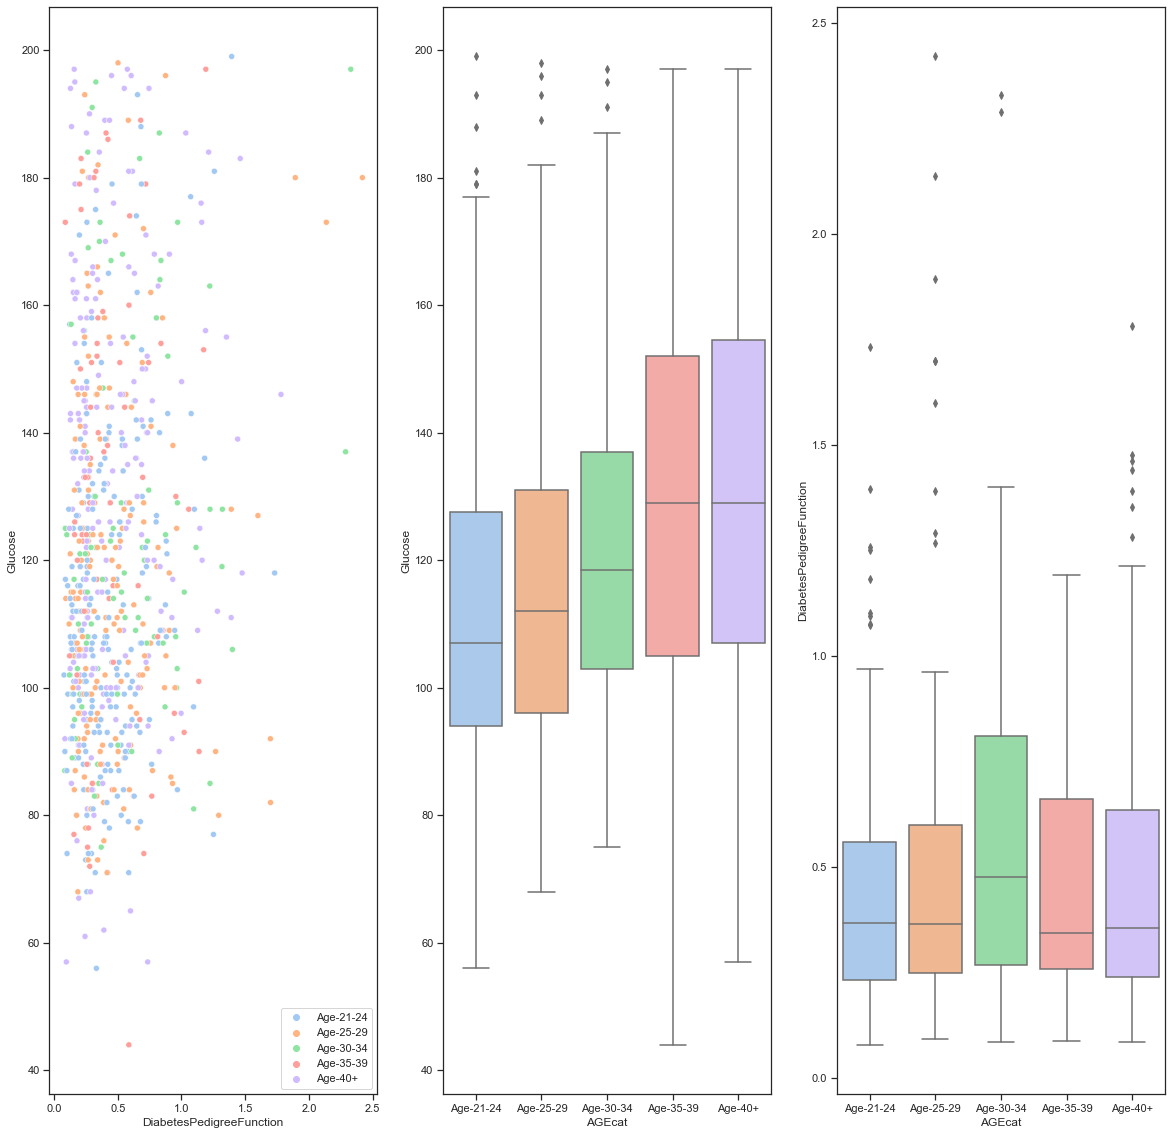

In [89]:
from matplotlib import rcParams

fig, axs = plt.subplots(ncols=3)
rcParams['figure.figsize'] = 20, 20
sns.scatterplot(data=df, x="DiabetesPedigreeFunction", y="Glucose", hue=df.AGEcat.tolist(), palette="pastel", 
                    hue_order = ["Age-21-24", "Age-25-29", "Age-30-34","Age-35-39", "Age-40+"], ax=axs[0])
sns.boxplot(data=df, x="AGEcat", y="Glucose", order = ["Age-21-24", "Age-25-29", "Age-30-34","Age-35-39", "Age-40+"], 
                palette="pastel", ax=axs[1])
sns.boxplot(data=df, x="AGEcat", y="DiabetesPedigreeFunction", 
                order = ["Age-21-24", "Age-25-29", "Age-30-34","Age-35-39", "Age-40+"], palette="pastel", ax=axs[2])
plt.show()

In [78]:
from pingouin import ancova
ancova(data=df, dv='Glucose', covar='DiabetesPedigreeFunction', between='AGEcat')

Source             SS   DF          F         p-unc  \
0                    AGEcat   45575.264788    4  13.303330  1.750998e-10   
1  DiabetesPedigreeFunction   11508.902420    1  13.437704  2.637314e-04   
2                  Residual  652625.141614  762        NaN           NaN   

        np2  
0  0.065275  
1  0.017329  
2       NaN

P-value for AGEcat is less than 0.05. Therefore, we can reject the null hypothesis that each of the age categories has the same average glucose levels, even after accounting for each woman's diabetes pedigree function score.

Diabetes pedigree function is significant in predicting glucose levels. Age and diabetes pedigree function have an independent effect on glucose levels.

In [79]:
# Summary statistics for dependent variable, glucose 
# Find count, mean, standard deviation for each level of categorical variable (BPcat)
df >> group_by(X.BPcat) >> summarize(n=X["Glucose"].count(), mean = X["Glucose"].mean(), std = X["Glucose"].std())

BPcat    n        mean        std
0    High  205  129.365854  29.100027
1  Normal  563  118.877442  30.492533

In [80]:
# Summary statistics for covariate, diabetes pedigree function
# Covariate = DiabetesPedigreeFunction -> removes genetic influence
df >> group_by(X.BPcat) >> summarize(n=X["DiabetesPedigreeFunction"].count(), 
                                mean = X["DiabetesPedigreeFunction"].mean(), std = X["DiabetesPedigreeFunction"].std())

BPcat    n      mean       std
0    High  205  0.494088  0.340959
1  Normal  563  0.463789  0.327686

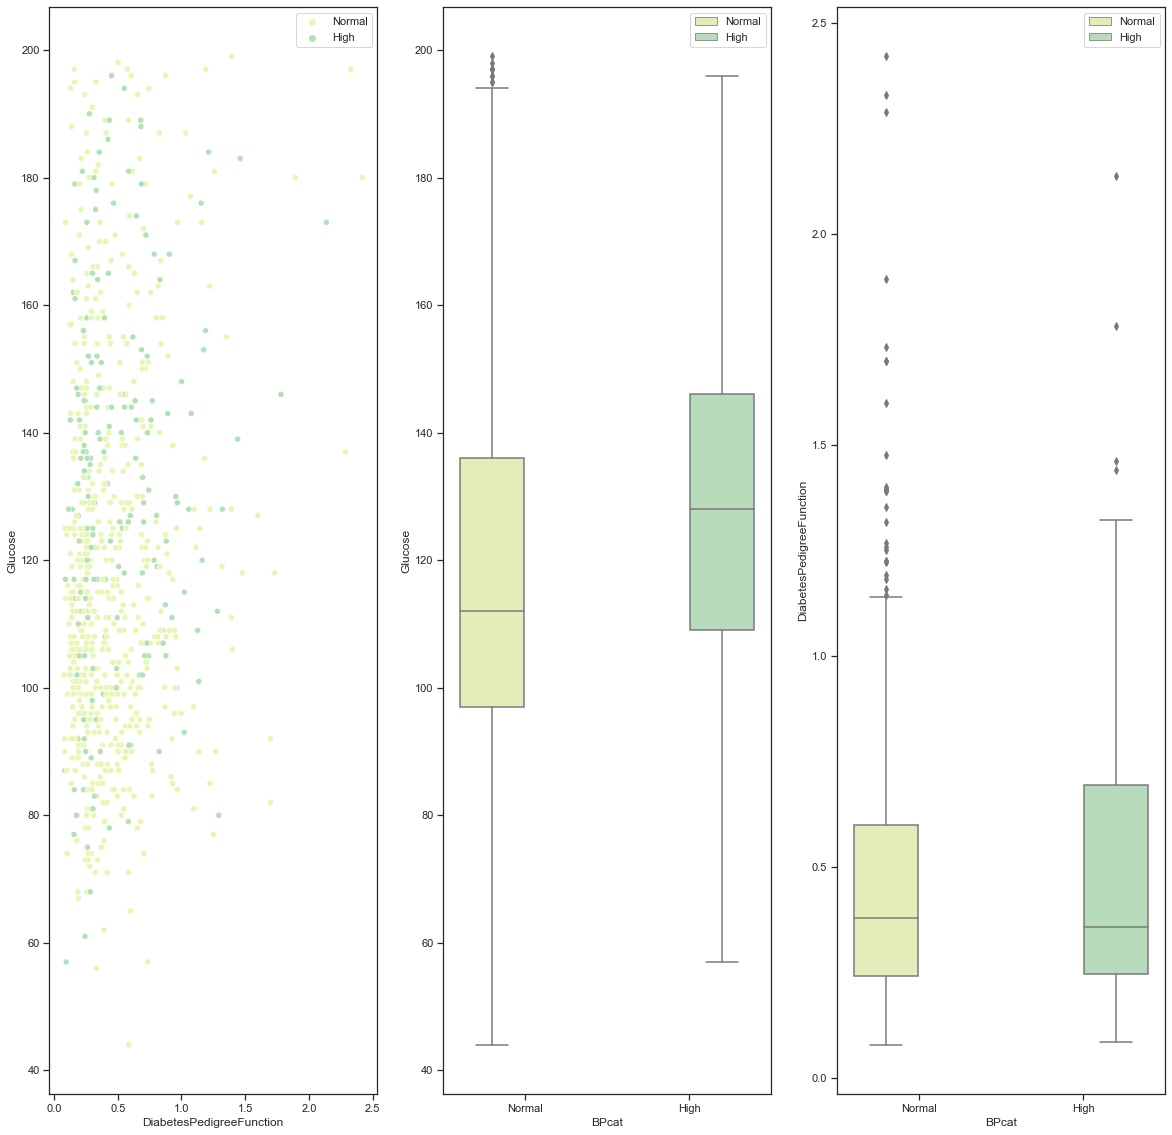

In [81]:
fig, axs = plt.subplots(ncols=3)
rcParams['figure.figsize'] = 12,10
sns.scatterplot(data=df, x="DiabetesPedigreeFunction", y="Glucose", hue=df.BPcat.tolist(), ax=axs[0])
sns.boxplot(data=df, x="BPcat", y="Glucose", hue=df.BPcat.tolist(), ax=axs[1])
sns.boxplot(data=df, x="BPcat", y="DiabetesPedigreeFunction", hue=df.BPcat.tolist(), ax=axs[2])
plt.show()

In [82]:
from pingouin import ancova
ancova(data=df, dv='Glucose', covar='DiabetesPedigreeFunction', between='BPcat')

Source             SS   DF          F     p-unc       np2
0                     BPcat   15364.270222    1  17.213012  0.000037  0.022006
1  DiabetesPedigreeFunction   12457.968314    1  13.957003  0.000201  0.017918
2                  Residual  682836.136179  765        NaN       NaN       NaN

P-value for BPcat is less than 0.05. Therefore, we can reject the null hypothesis that each of the blood pressure categories has the same average glucose levels, even after accounting for each woman's diabetes pedigree function score.

Blood pressure and diabetes pedigree function have an independent effect on glucose levels.

## Power Analyses

In [83]:
# Parameters for Analysis 
effect_size = 0.8 # Commonly accepted effect size - considered to be large
alpha = 0.05 # Common significance level
power = 0.8 # Default statistical power to achieve

# Analysis for a sample T-test
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


To achieve a power of 80% when alpha is 0.05 and effect size is 0.8, a sample size of 25 is required.

In [84]:
# Given the approximate effect size for the post hoc test for the one-way ANOVA between glucose and blood pressure
effect_size = 0.35
alpha = 0.05 
power = 0.8 # Default statistical power to achieve

# Analysis for a sample T-test
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 129.11


To achieve a power of 80% when alpha is 0.05 and effect size is 0.35, a sample size of 129 is required. This is compared to our dataset which has a sample size of 768.

In [85]:
es_pwr = []
es_pwr= [0.2,0],[0.35,0],[0.5,0],[0.8,0]
df_size=len(df)
i=0
while i < len(es_pwr):
    power_analysis = TTestIndPower()
    power = power_analysis.solve_power(effect_size = es_pwr[i][0], # Calculates power given the different effect sizes in
                                       nobs1 = df_size,            # our array, the number of observations in our dataset,
                                       alpha = alpha)              # and an alpha level of 0.05
    es_pwr[i][1] = round(power,4)
    i+=1
print(es_pwr)

([0.2, 0.9748], [0.35, 1.0], [0.5, 1.0], [0.8, 1.0])


A power of 1 is achieved when the effect size is 0.35. This is attributable to the large number of observations. 

In [86]:
es_pwr
[x[0] for x in es_pwr]

[0.2, 0.35, 0.5, 0.8]

Compared to the commonly accepted effect sizes (i.e., 0.2, 0.5, and 0.8), the effect size calculated for the post hoc test for the one-way ANOVA between glucose and blood pressure - which approximates 0.35 - is small-medium.

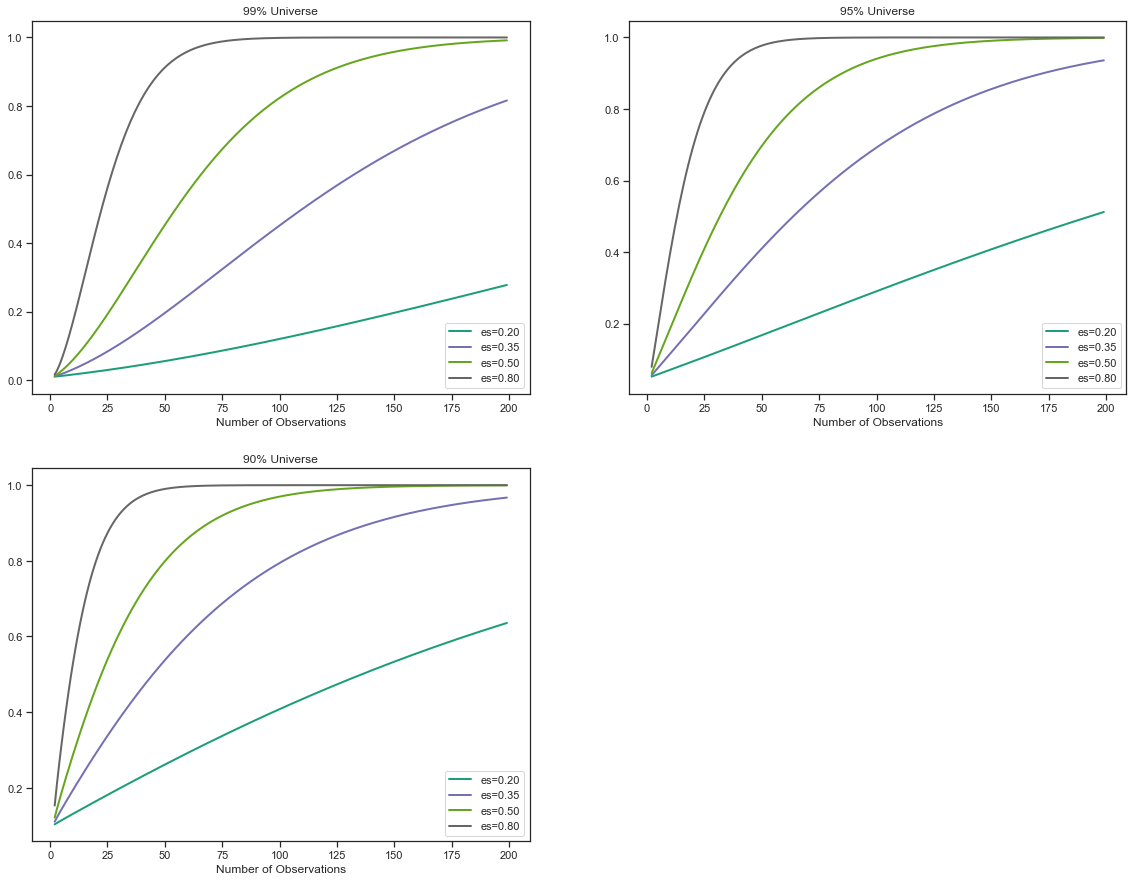

In [87]:
# Changing alpha level and and effect size on power
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.01, # Statistical significance is 1%
                               ax=ax, title='99% Universe')
ax = fig.add_subplot(2,2,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.05, # Statistical significance is 5%
                               ax=ax, title='95% Universe')
ax = fig.add_subplot(2,2,3)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.1, # Statistical significance is 10%
                               ax=ax, title='90% Universe')
fig.subplots_adjust(top =  2.5, right = 2.5)

As sample size increases, power increases.

As alpha increases, less observations are required to achieve the same statistical power. 

Likewise, as effect size increases, a smaller sample size is needed to achieve the same power.

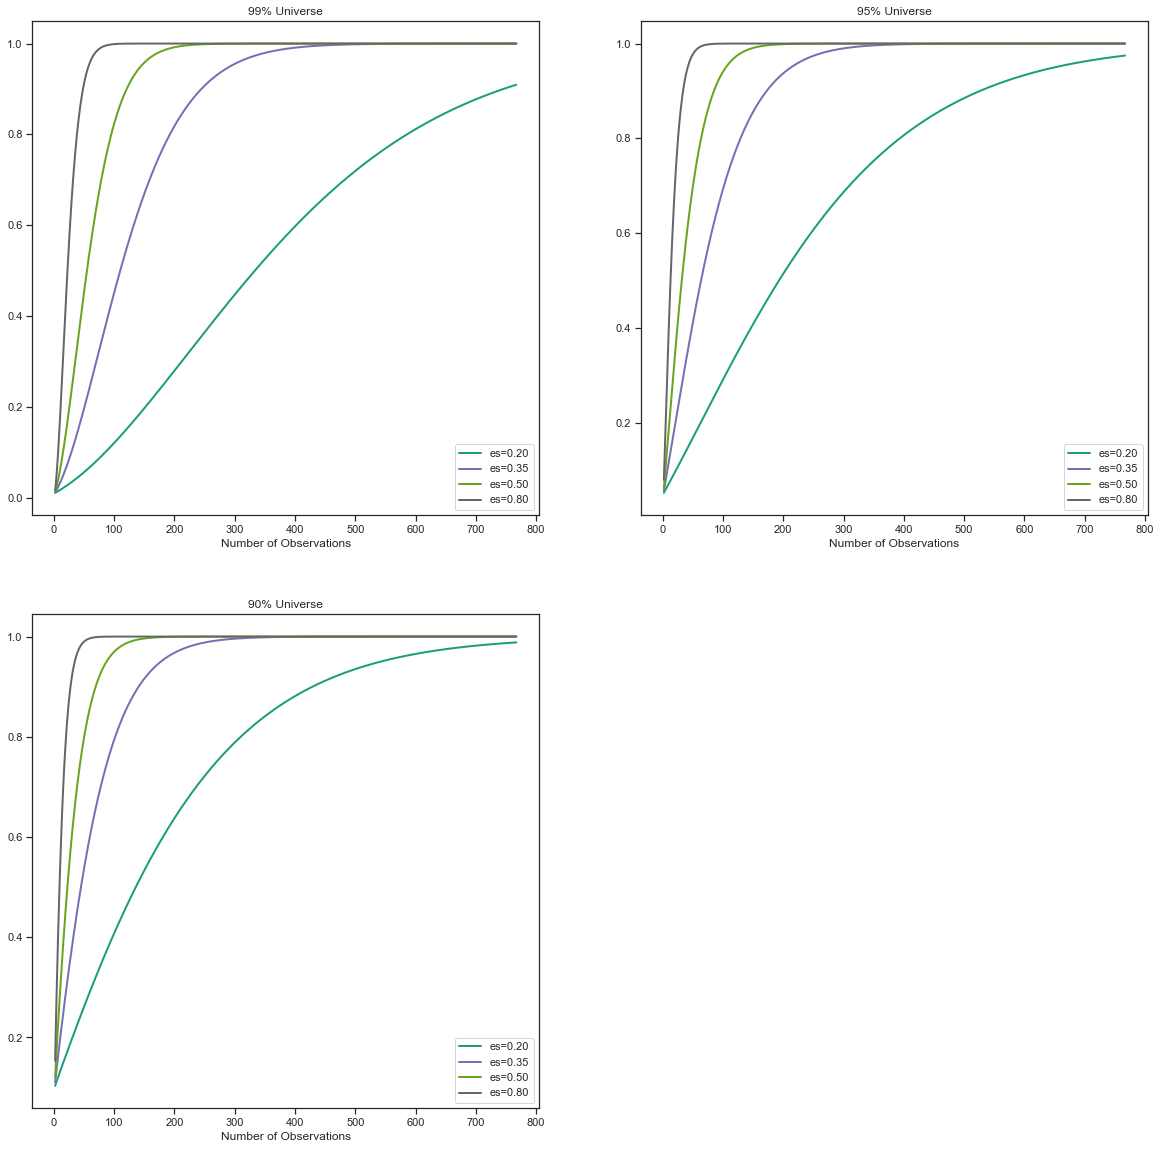

In [88]:
# Increasing sample size to the size of our dataset
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,df_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.01, # Statistical significance is 1%
                               ax=ax, title='99% Universe')
ax = fig.add_subplot(2,2,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,df_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.05, # Statistical significance is 5%
                               ax =ax, title='95% Universe')
ax = fig.add_subplot(2,2,3)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,df_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.1, # Statistical significance is 10%
                               ax=ax, title='90% Universe')

Increased sample size resulted in increased power.